In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [8]:
url = 'https://www.drugabuse.gov/sites/default/files/overdose_data_1999-2015.xls'
overdoses = pd.read_excel(url,sheet_name='Online',skiprows =6)
def get_data(table,rownum,title):
    data = pd.DataFrame(table.loc[rownum][2:]).astype(float)
    data.columns = {title}
    return data

In [19]:
%matplotlib notebook

title = 'Heroin Overdoses'

d = get_data(overdoses,18,title)
x = np.array(d.index)
y = np.array(d['Heroin Overdoses'])

overdose = pd.DataFrame(y,x)

XN,YN = augment(x,y,10)
augmented = pd.DataFrame(YN,XN)

overdose.columns = {title}

In [10]:
# This below will save the file and use ffmpeg and record at 20fps w/ bitrate of 1800
# Not necessary to graph
# Writer = animation.writers['ffmpeg']
# writer = Writer(fps=20, metadata=dict(artist='Me'), bitrate=1800)

<IPython.core.display.Javascript object>


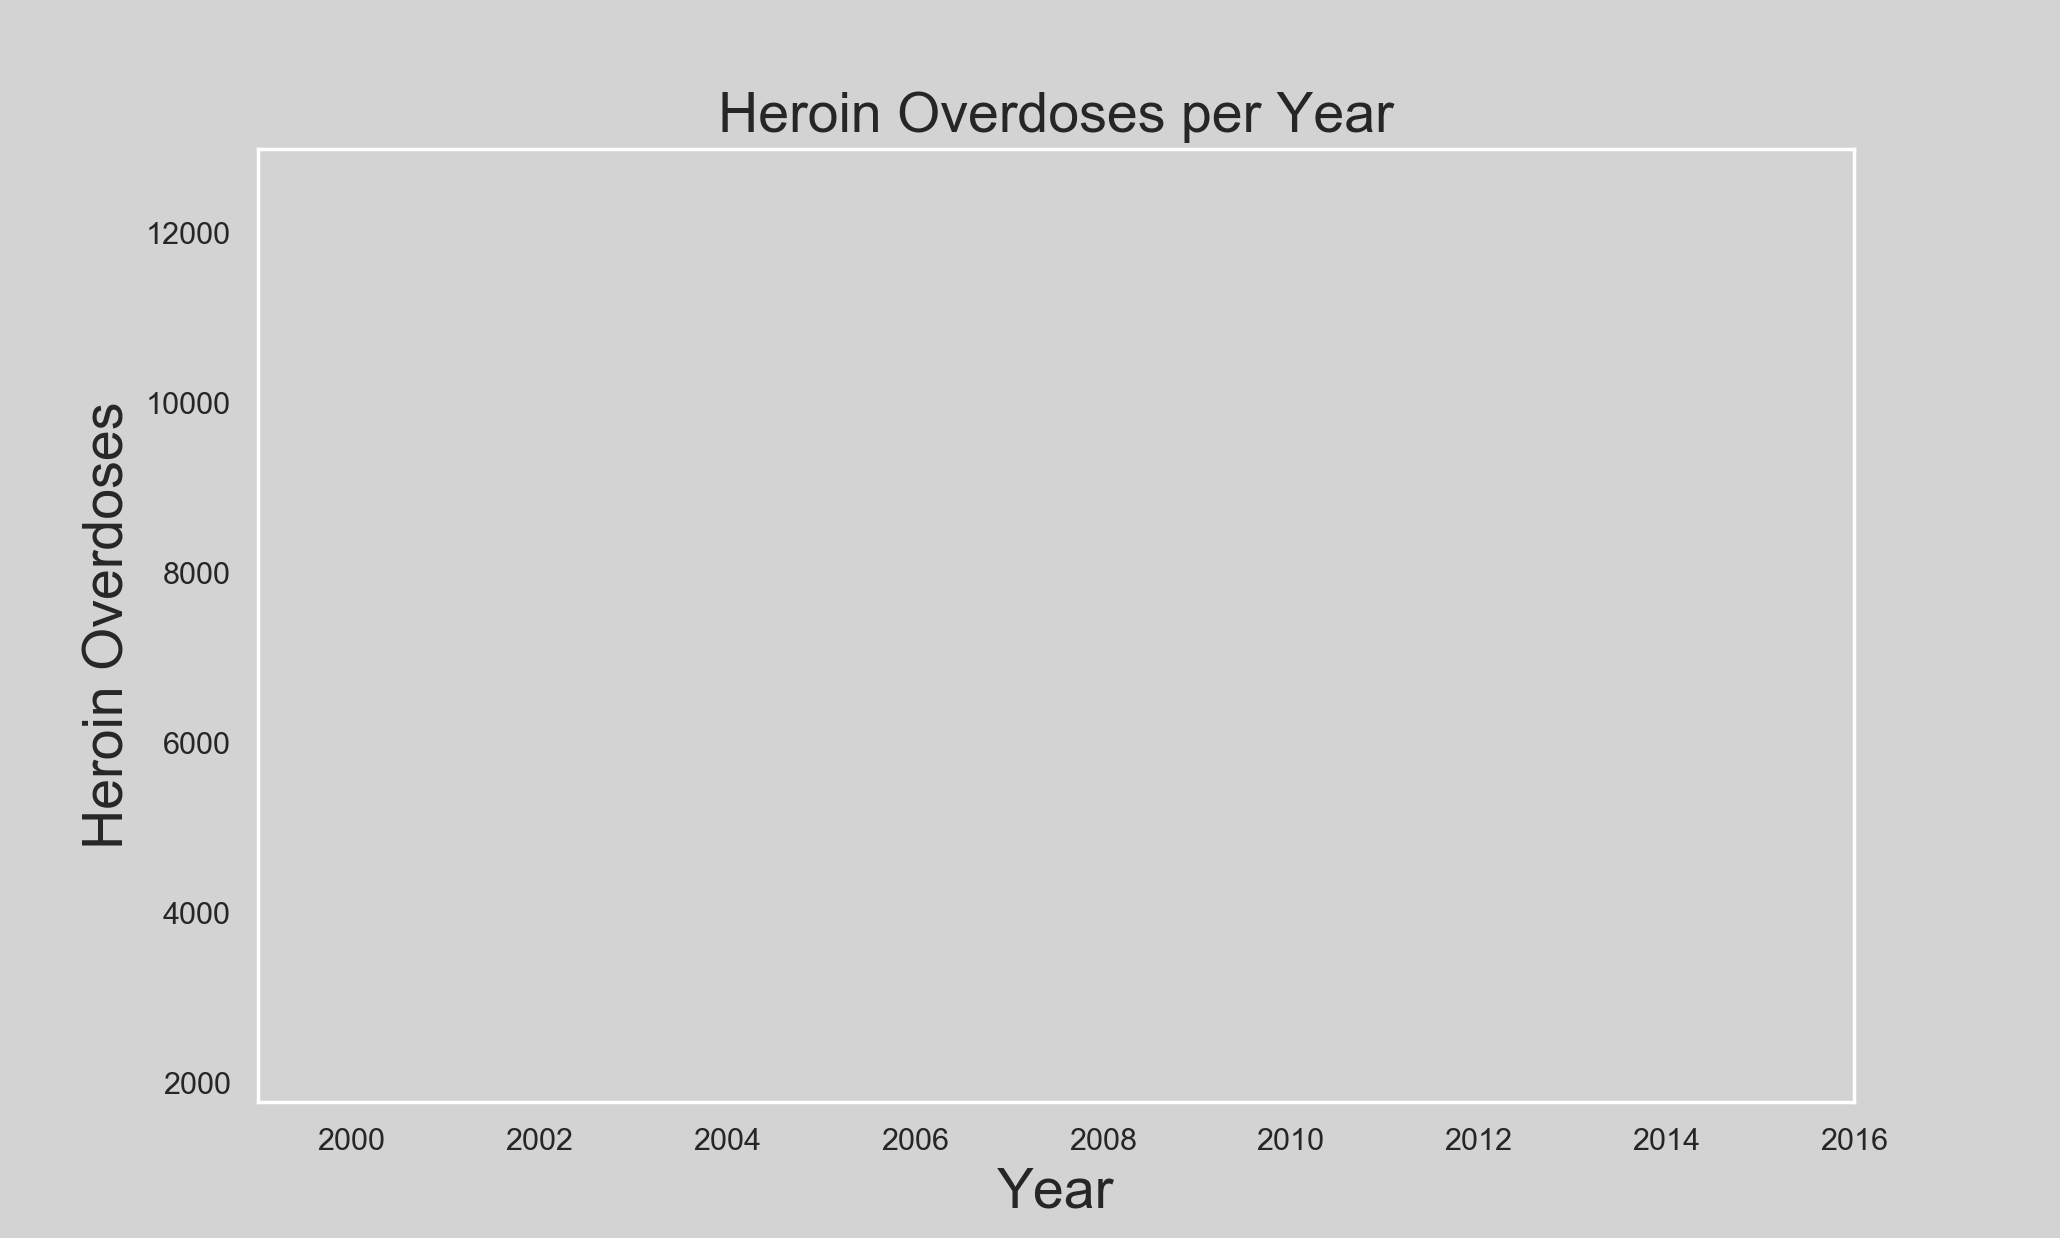

Text(0.5, 1.0, 'Heroin Overdoses per Year')

In [18]:
fig = plt.figure(figsize=(10,6))
plt.xlim(1999, 2016)
plt.ylim(np.min(overdose)[0], np.max(overdose)[0])
plt.xlabel('Year',fontsize=20)
plt.ylabel(title,fontsize=20)
plt.title('Heroin Overdoses per Year',fontsize=20)

In [13]:
def animate(i):
    data = overdose.iloc[:int(i+1)] #select data range
    p = sns.lineplot(x=data.index, y=data[title], data=data, color="r")
    p.tick_params(labelsize=17)
    plt.setp(p.lines,linewidth=7)

In [14]:
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=17, repeat=True)

In [15]:
#ani.save('HeroinOverdosesJumpy.mp4', writer=writer)

In [16]:
def augment(xold,yold,numsteps):
    xnew = []
    ynew = []
    for i in range(len(xold)-1):
        difX = xold[i+1]-xold[i]
        stepsX = difX/numsteps
        difY = yold[i+1]-yold[i]
        stepsY = difY/numsteps
        for s in range(numsteps):
            xnew = np.append(xnew,xold[i]+s*stepsX)
            ynew = np.append(ynew,yold[i]+s*stepsY)
    return xnew,ynew


In [17]:
def smoothListGaussian(listin,strippedXs=False,degree=5):  
    window=degree*2-1  
    weight=np.array([1.0]*window)  
    weightGauss=[]  
    for i in range(window):  
        i=i-degree+1  
        frac=i/float(window)  
        gauss=1/(np.exp((4*(frac))**2))  
        weightGauss.append(gauss)
    weight=np.array(weightGauss)*weight  
    smoothed=[0.0]*(len(listin)-window)  
    for i in range(len(smoothed)):        
        smoothed[i]=sum(np.array(listin[i:i+window])*weight)/sum(weight)  
    return smoothed

In [6]:
sns.set(rc={'axes.facecolor':'lightgrey', 'figure.facecolor':'lightgrey',
            'figure.edgecolor':'black','axes.grid':False})